### Boilerplate code - llm initiation

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

load_dotenv("./env")

google_api_key = os.getenv("GOOGLE_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

google_llm = ChatGoogleGenerativeAI(
    temperature=0, 
    model="gemini-2.5-flash", 
    api_key=google_api_key,
    max_tokens=200
)

openai_llm = ChatOpenAI(
    temperature=0, 
    model="gpt-4", 
    api_key=openai_api_key
)

# openai_llm.invoke("Hello")

### Three ways of defining State schema

- TypedDict
- Dataclass
- Pydantic

### Defing State using TypecDict

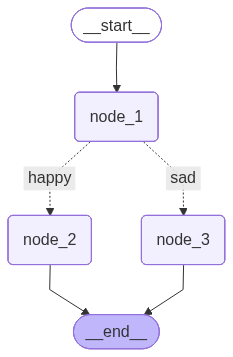

{'name': 'Praveen is...', 'mood': 'sad'}


In [22]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from IPython.display import display, Image
import random

class State(TypedDict):
    name: str
    mood: str

def node_1(state: State):
    return {"name": state.get('name') + " is..."}

def node_2(state: State):
    return {"mood": "happy"}

def node_3(state: State):
    return {"mood": "sad"}

def decide_mood(state: State) -> Literal["happy", "sad"]:
    ran = random.random()
    if ran < 0.5:
        return "happy"
    if ran < 1:
        return "sad"


builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)


builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood, {"happy": "node_2", "sad": "node_3"})
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)


graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

res = graph.invoke({"name": "Praveen"})

print(res)


### Defining State using Dataclass

{'name': '12 is ', 'mood': 'sad'}


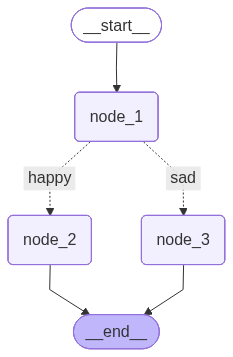

In [ ]:
from dataclasses import dataclass
from langgraph.graph import StateGraph, START, END
from typing import Optional

@dataclass
class State:
    name: str
    mood: Optional[str] = None

builder = StateGraph(State)

def node_1(state):
    return {"name": f"{state.name} is "}

def node_2(state):
    return {"mood": 'happy'}

def node_3(state):
    return {"mood": 'sad'}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    ran = random.random()
    if ran <= 0.5:
        return "happy"
    else:
        return "sad"

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood, {"happy": "node_2", "sad": "node_3"})
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

res = graph.invoke(State(name="Praveen"))
print(res)

display(Image(graph.get_graph().draw_mermaid_png()))

### Defining State using Pydantic

{'name': 'Praveen is ', 'mood': 'sad'}


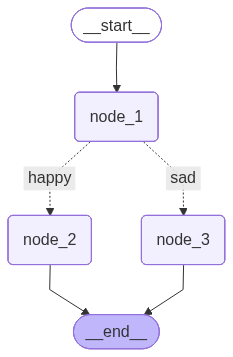

In [59]:
from pydantic import BaseModel, field_validator, ValidationError
from langgraph.graph import StateGraph, START, END
from typing import Optional

class State(BaseModel):
    name: str
    mood: str

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        if value not in ['happy', 'sad']:
            raise ValueError("Mood should be 'happy' or 'sad'")
        return value



builder = StateGraph(State)

def node_1(state):
    return {"name": f"{state.name} is "}

def node_2(state):
    return {"mood": 'happy'}

def node_3(state):
    return {"mood": 'sad'}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    ran = random.random()
    if ran <= 0.5:
        return "happy"
    else:
        return "sad"

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood, {"happy": "node_2", "sad": "node_3"})
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

res = graph.invoke(State(name="Praveen", mood="happy"))
print(res)

display(Image(graph.get_graph().draw_mermaid_png()))